In [20]:
import tensorflow as tf
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

# load custom data
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# split data 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# nirmallize data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# create model and layers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(4, activation=tf.nn.softmax))

# magic...
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
503/503 [==============================] - 2s 3ms/step - loss: 0.2690 - accuracy: 0.9360
Epoch 2/3
503/503 [==============================] - 1s 3ms/step - loss: 0.0192 - accuracy: 0.9939
Epoch 3/3
503/503 [==============================] - 1s 3ms/step - loss: 0.0075 - accuracy: 0.9980


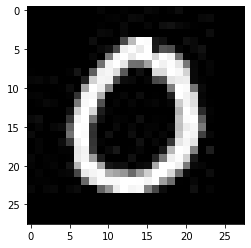

In [13]:
# create custom data set
import os
import cv2
import matplotlib.pyplot as plt
import random
import pickle

DATADIR = 'dataset'
CATEGORIES = ["0", "1", "-", "3"]

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                training_data.append([img_array, class_num])
            except Exception as e:
                pass

create_training_data()

# shuffle trainging data
random.shuffle(training_data)

X = []
y = []

# push data to variables
for features, label in training_data:
    X.append(features)
    y.append(label)

y = np.array(y)


# pack data to pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [31]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)
model.save('trajectory_recognition.model')
# to load use new_model = tf.keras.models.load_model('trajectory_recognition.model')

56/56 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9899
0.03009192831814289 0.9899216294288635
INFO:tensorflow:Assets written to: trajectory_recognition.model/assets


2
----


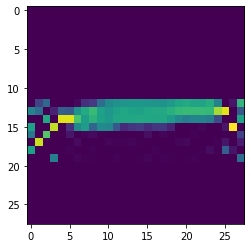

1


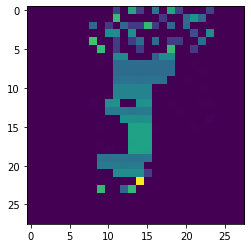

In [30]:
import cv2

predictions = model.predict([np.array([x_test[0]])])
print(np.argmax(predictions))
print("----")

plt.imshow(x_test[0])
plt.show()

# read image and convert
im = cv2.imread("blank_image.jpg", cv2.IMREAD_GRAYSCALE)
im = cv2.bitwise_not(im)
im = tf.keras.utils.normalize(im, axis=1)
plt.imshow(im)

# prediction
predictions = model.predict([np.array([im])])
print(np.argmax(predictions))